# Ensemble learning

In [1]:
# conda install jupyter ipykernel nb_conda jupyterlab matplotlib seaborn pandas numpy scikit-learn scipy lightgbm xgboost catboost

# Downloading data

source = 'https://www.kaggle.com/antfarol/car-sale-advertisements/download'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [3]:
# # !wget -O car_ad.csv  'https://www.kaggle.com/antfarol/car-sale-advertisements/car_ad.csv'
# wget -P https://www.kaggle.com/antfarol/car-sale-advertisements/download/car_ad.csv


In [4]:
# df = pd.read_csv("car_ad.csv")
# df.head()

In [5]:
import os

link = os.path.expanduser("~/Downloads/car_ad.csv")
print(link)
df = pd.read_csv(link, encoding="latin1")
df.head()

/Users/artyomkolas/Downloads/car_ad.csv


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [6]:
df = df[['price', 'body', 'mileage', 'engV', 'engType', 'year', 'drive']]
df.head(2)

,price,body,mileage,engV,engType,year,drive
0,15500.0,crossover,68,2.5,Gas,2010,full
1,20500.0,sedan,173,1.8,Gas,2011,rear


# Pre-Processing

https://github.com/kolasdevpy/Regressions/blob/master/Multiple%20Linear%20Regression.ipynb

In [7]:
df.replace("?", np.nan, inplace = True)
df.head(2)

,price,body,mileage,engV,engType,year,drive
0,15500.0,crossover,68,2.5,Gas,2010,full
1,20500.0,sedan,173,1.8,Gas,2011,rear


In [8]:
features = ['price', 'body', 'mileage', 'engV', 'engType', 'year', 'drive']
for el in features:
    print(f'=============================== {el} =============================')
    print(df[el].value_counts(dropna=False))

=============================== price =============================
0.00000        267
8500.00000      92
6500.00000      86
7500.00000      85
10500.00000     83
              ... 
26220.28500      1
67900.00000      1
3333.00000       1
460.00000        1
11280.79875      1
Name: price, Length: 1353, dtype: int64
=============================== body =============================
sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64
=============================== mileage =============================
0      348
1      304
200    171
150    131
250    128
      ... 
427      1
840      1
920      1
419      1
435      1
Name: mileage, Length: 442, dtype: int64
=============================== engV =============================
2.00    1539
1.60    1229
3.00     703
1.50     692
1.80     585
        ... 
1.36       1
4.25       1
6.40       1
1.35       1
1.79       1
Name: engV, Length: 118, dtype: int64
===

In [9]:
df.dtypes

price      float64
body        object
mileage      int64
engV       float64
engType     object
year         int64
drive       object
dtype: object

In [10]:
df['drive'].replace(to_replace="front", value=1, inplace=True)
df['drive'].replace(to_replace="rear",  value=3, inplace=True)
df['drive'].replace(to_replace="full",  value=2, inplace=True)
df['drive'].replace(np.nan,                   4, inplace=True)
df['drive'] = df['drive'].astype("int")
df['drive'].value_counts(dropna=False)

1    5188
2    2500
3    1377
4     511
Name: drive, dtype: int64

In [11]:
df[['price']] = df[['price']].astype("int")
print(df['price'].value_counts(dropna=False))

0        267
8500      92
6500      86
7500      85
10500     83
        ... 
6928       1
6880       1
10974      1
2778       1
13972      1
Name: price, Length: 1348, dtype: int64


In [12]:
df['body'].replace(to_replace="sedan",     value=1, inplace=True)
df['body'].replace(to_replace="crossover", value=2, inplace=True)
df['body'].replace(to_replace="hatch",     value=3, inplace=True)
df['body'].replace(to_replace="van",       value=4, inplace=True)
df['body'].replace(to_replace="other",     value=5, inplace=True)
df['body'].replace(to_replace="vagon",     value=6, inplace=True)

df[['body']] = df[['body']].astype("int")
print(df['body'].value_counts(dropna=False))


1    3646
2    2069
3    1252
4    1049
5     838
6     722
Name: body, dtype: int64


In [13]:
df['engType'].replace(to_replace="Petrol",     value=1, inplace=True)
df['engType'].replace(to_replace="Diesel",     value=2, inplace=True)
df['engType'].replace(to_replace="Gas",        value=3, inplace=True)
df['engType'].replace(to_replace="Other",      value=4, inplace=True)

df[['engType']] = df[['engType']].astype("int")
print(df['engType'].value_counts(dropna=False))


1    4379
2    3013
3    1722
4     462
Name: engType, dtype: int64


In [14]:
df.dtypes

price        int64
body         int64
mileage      int64
engV       float64
engType      int64
year         int64
drive        int64
dtype: object

In [15]:
df.shape

(9576, 7)

In [16]:
df.dropna(subset=['engV'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df['engV'].value_counts(dropna=False)

2.00     1539
1.60     1229
3.00      703
1.50      692
1.80      585
         ... 
1.36        1
22.00       1
1.79        1
1.35        1
2.28        1
Name: engV, Length: 117, dtype: int64

In [17]:
df.shape

(9142, 7)

In [18]:
df.dtypes

price        int64
body         int64
mileage      int64
engV       float64
engType      int64
year         int64
drive        int64
dtype: object

# Data cleaning

In [19]:
df = df.loc[df['price'] != 0] 
df.reset_index(drop=True, inplace=True)
df['price'].value_counts(dropna=False)

8500     90
7500     82
6500     80
10500    80
3500     76
         ..
28777     1
23880     1
50499     1
13621     1
407       1
Name: price, Length: 1301, dtype: int64

In [20]:
df = df.loc[df['price'] < 200000] 
df.reset_index(drop=True, inplace=True)
df['price'].value_counts(dropna=False)

8500      90
7500      82
10500     80
6500      80
3500      76
          ..
35162      1
35138      1
45600      1
10550      1
123000     1
Name: price, Length: 1287, dtype: int64

In [21]:
df = df.loc[df['engV'] > 0.5] 
df.reset_index(drop=True, inplace=True)
df['engV'].value_counts(dropna=False)

2.00    1509
1.60    1210
1.50     681
3.00     633
1.80     581
        ... 
1.36       1
1.79       1
6.40       1
1.35       1
2.28       1
Name: engV, Length: 113, dtype: int64

In [22]:
df = df.loc[df['engV'] < 10] 
df.reset_index(drop=True, inplace=True)
df['engV'].value_counts(dropna=False)

2.00    1509
1.60    1210
1.50     681
3.00     633
1.80     581
        ... 
1.24       1
1.79       1
9.00       1
1.35       1
2.28       1
Name: engV, Length: 93, dtype: int64

In [23]:
df = df.loc[df['year'] > 1980] 
df.reset_index(drop=True, inplace=True)
df['year'].value_counts(dropna=False)

2008    1096
2007     869
2012     714
2011     666
2013     574
2006     536
2005     380
2010     372
2016     368
2009     326
2004     323
2014     310
2003     264
2000     213
2002     210
2001     197
2015     197
1999     149
1998     140
1997     113
1996     111
1995      84
1994      73
1991      64
1992      60
1990      58
1988      56
1993      50
1989      46
1986      41
1987      39
1985      21
1984      15
1982      10
1983       7
1981       5
Name: year, dtype: int64

In [24]:
df = df.loc[df['mileage'] > 1] 
df.reset_index(drop=True, inplace=True)
df['mileage'].value_counts(dropna=False)

200    161
250    122
150    119
180    114
160    114
      ... 
520      1
600      1
427      1
840      1
547      1
Name: mileage, Length: 435, dtype: int64

In [25]:
df = df.loc[df['mileage'] < 400] 
df.reset_index(drop=True, inplace=True)
df['mileage'].value_counts(dropna=False)

200    161
250    122
150    119
160    114
180    114
      ... 
392      1
384      1
356      1
336      1
389      1
Name: mileage, Length: 377, dtype: int64

In [26]:
df.shape

(8110, 7)

In [27]:
target_column = ['price'] 
predictors = list(set(list(df.columns))-set(target_column))

# normalization
df[predictors] = df[predictors]/df[predictors].max()

df.describe()

,price,body,mileage,engV,engType,year,drive
count,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000
mean,13943.037608,0.422503,0.364972,0.247409,0.445684,0.995275,0.416523
std,15881.944895,0.274419,0.205442,0.107218,0.214278,0.003035,0.219231
min,370.000000,0.166667,0.005025,0.066667,0.250000,0.982639,0.250000
25%,5500.000000,0.166667,0.211055,0.177778,0.250000,0.994048,0.250000
50%,9300.000000,0.333333,0.339196,0.222222,0.500000,0.996032,0.250000
75%,15900.000000,0.666667,0.497487,0.277778,0.500000,0.997520,0.500000
max,195000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
predictors

['body', 'engV', 'drive', 'year', 'engType', 'mileage']

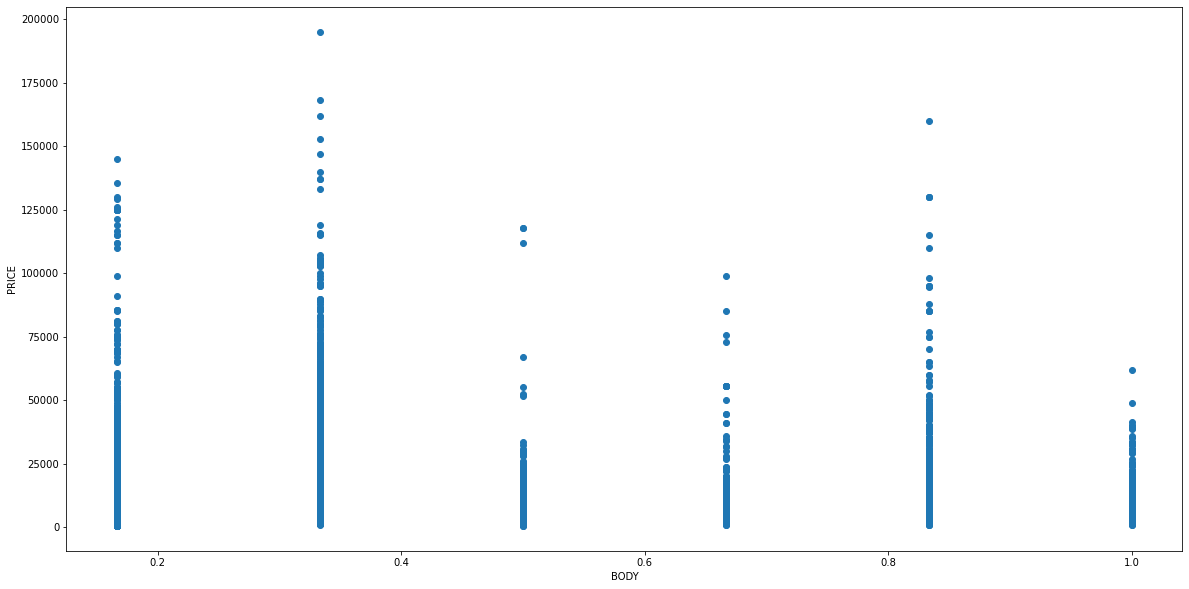

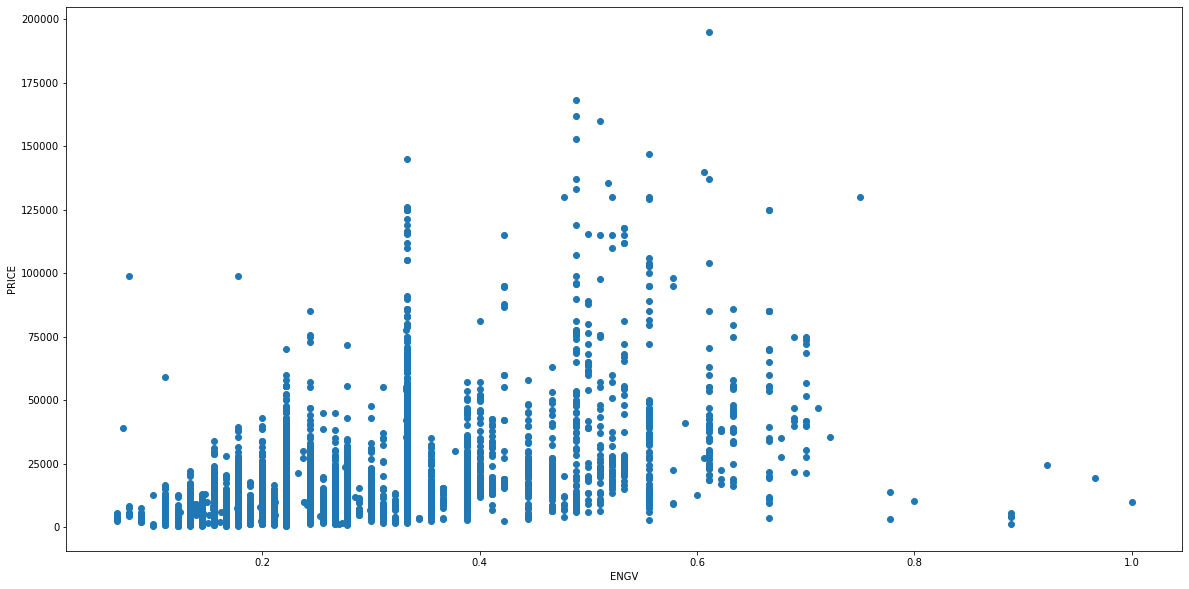

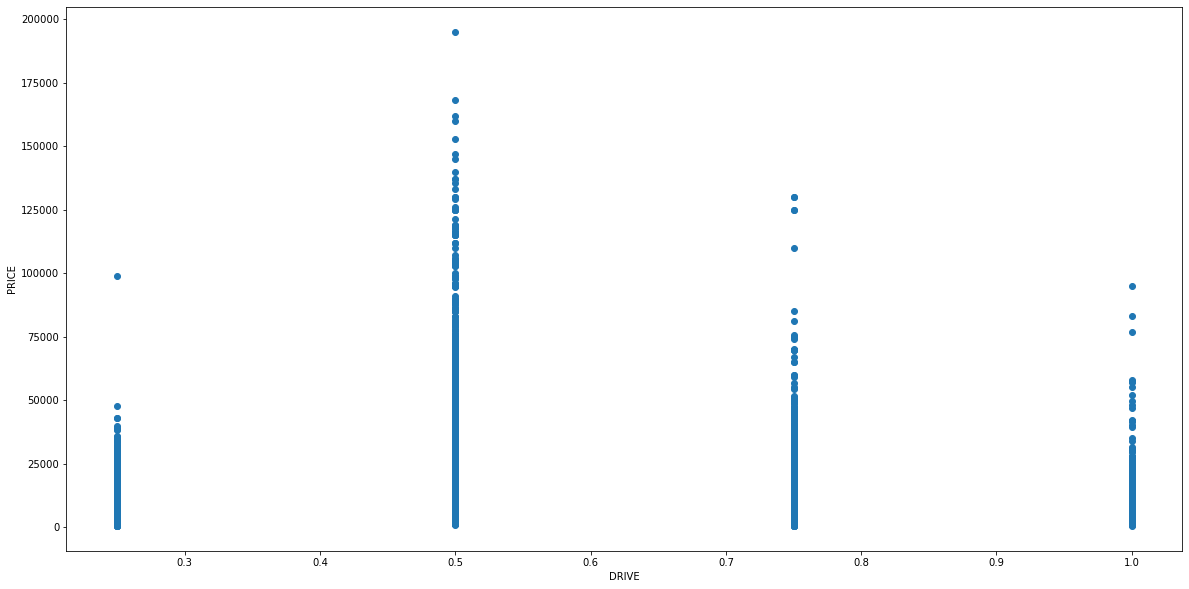

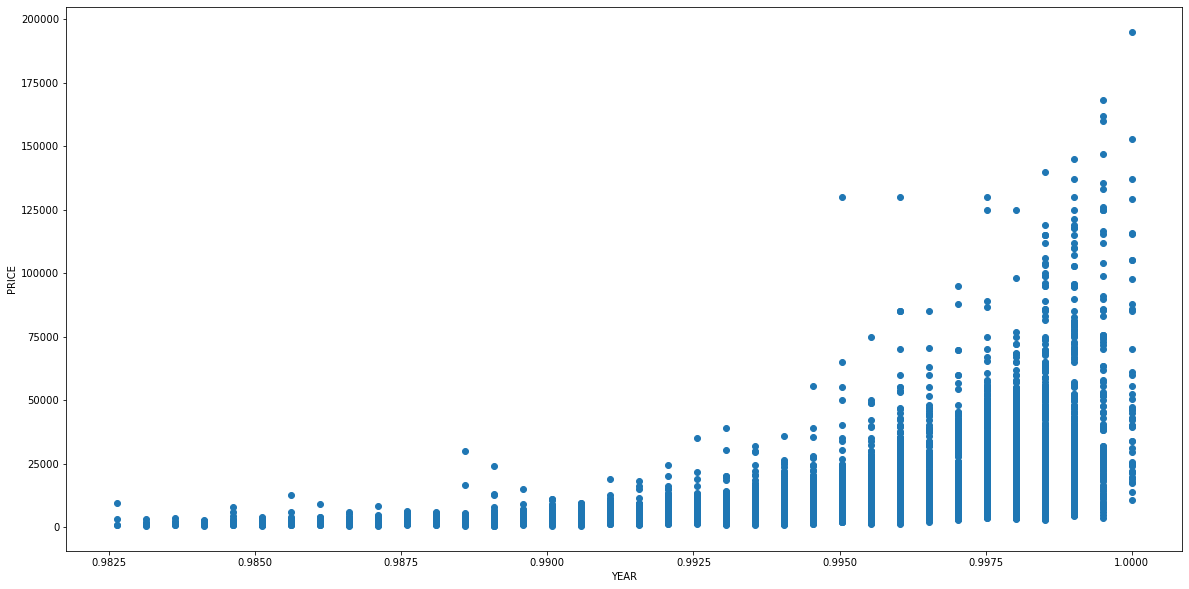

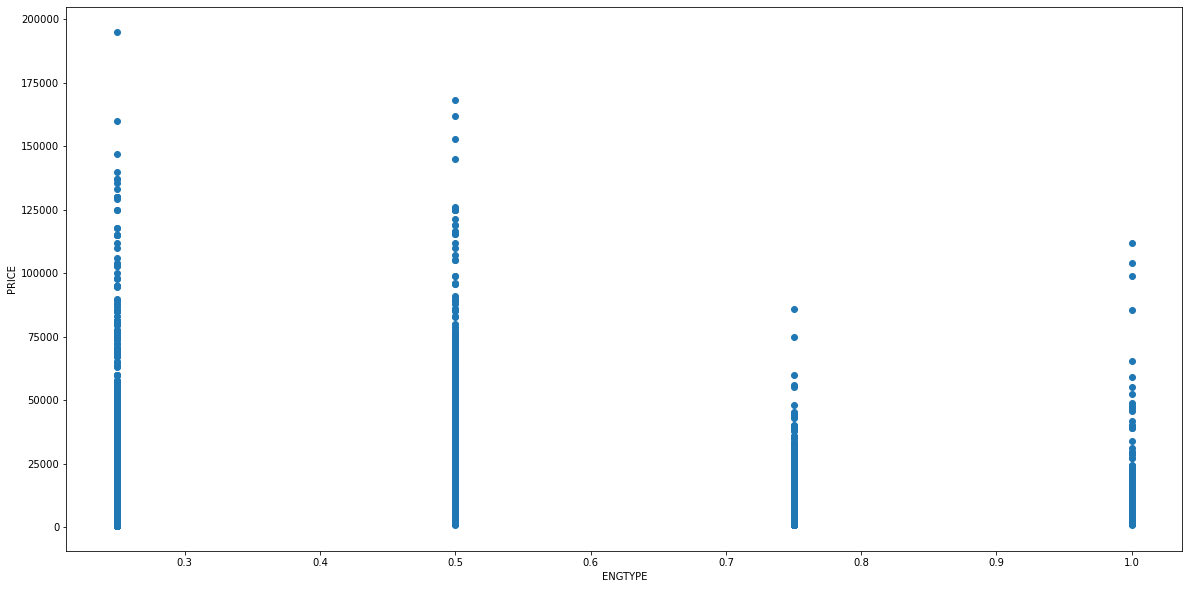

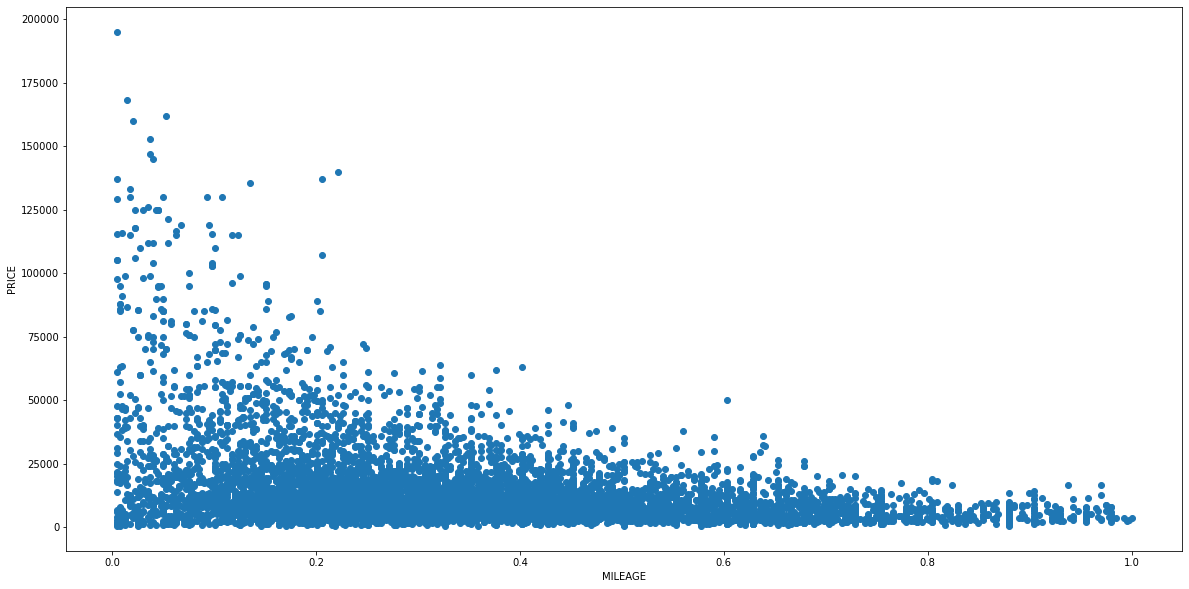

In [29]:
for el in predictors:
    print('')
    label = el
    el = df[el]
    plt.figure(figsize=(20,10))
    try:
        plt.scatter(el, df.price)
    except:
        print(Error)
    plt.xlabel(label.upper())
    plt.ylabel("PRICE")
    plt.show()
    print('')

# Ensemble learning with feature selection (including train_test_split)

In [30]:
X = predictors    # type list !!!

y = df[target_column]    # df
y = np.ravel(y)


def get_combinations(X):
    '''get all combinations of X features'''
    import itertools
    global combinations
    combinations = []
    for L in range(0, len(X)+1):
         for subset in itertools.combinations(X, L):
            subset = list(subset)
            combinations.append(subset)
    return combinations


def iterative_evaluation(df, y, combinations):
    '''iterative evaluation of all features'''
    comand = input(f'You have {len(combinations) - 1} combinations of X features.'
                   f' Input y/n for continuous (+ press enter/return)')
    if comand == 'n':
        return 'OK'
    elif comand == 'y':
        
# Imports _________________________________________________________
        from sklearn.model_selection import train_test_split

        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor
        import lightgbm as lgb
        import xgboost as xgb
        import catboost as ctb
    

# Imports of metrics ______________________________________________
        from sklearn.metrics import mean_squared_error
        from math import sqrt
        from sklearn.metrics import r2_score
        
        
# Creare evaluations lists ________________________________________
        global DecisionTree_evaluations
        DecisionTree_evaluations = []
        
        global RandomForest_evaluations
        RandomForest_evaluations = []
        
        global LGBM_evaluations
        LGBM_evaluations = []
        
        global XGB_evaluations
        XGB_evaluations = []
        
        global CatBoost_evaluations
        CatBoost_evaluations = []
        
        global all_evaluations
        all_evaluations = []
        
        
# Classifier Entity _______________________________________________
        dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.13, random_state=3)
        model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
        lgbm = lgb.LGBMRegressor()
        xgbm = xgb.XGBRegressor()
        ctbm = ctb.CatBoostRegressor(verbose=False)
        

        i=1    
        for el in combinations[1:]:                       
            print(f'Inprogress {i}/{len(combinations) - 1}')
            el = list(el)
            
            X = df[el]
            
# Model train and evaluation ______________________________________
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
            
# Model train and evaluation ______________________________________
            # DecisionTreeRegressor
            dtree.fit(X_train, y_train)
            pred_test_tree= dtree.predict(X_test)
            MSE = np.sqrt(mean_squared_error(y_test,pred_test_tree)) 
            R2 = r2_score(y_test, pred_test_tree)
            DecisionTree_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'DecisionTree:', el])
            

            # RandomForestRegressor
            model_rf.fit(X_train, y_train) 
            pred_test_rf = model_rf.predict(X_test)
            MSE = np.sqrt(mean_squared_error(y_test,pred_test_rf)) 
            R2 = r2_score(y_test, pred_test_rf)
            RandomForest_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'RandomForest:', el])

            
            # LGBMRegressor
            lgbm.fit(X_train,y_train)
            pred_test_lgb = lgbm.predict(X_test)
            MSE = np.sqrt(mean_squared_error(y_test,pred_test_lgb)) 
            R2 = r2_score(y_test, pred_test_lgb)
            LGBM_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'LGBMRegressor:', el])
            
            
            # XGBRegressor
            xgbm.fit(X_train, y_train)
            pred_test_xgb = xgbm.predict(X_test)
            MSE = np.sqrt(mean_squared_error(y_test,pred_test_xgb)) 
            R2 = r2_score(y_test, pred_test_xgb)
            XGB_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'XGBRegressor:', el])
            
            
            # CatBoostRegressor
            ctbm.fit(X_train, y_train)
            pred_test_ctb = ctbm.predict(X_test)
            MSE = np.sqrt(mean_squared_error(y_test,pred_test_ctb)) 
            R2 = r2_score(y_test, pred_test_ctb)
            CatBoost_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'CatBoostRegr:', el])
            
            i+=1

# GLOBAL TOTAL LIST OF ALL EVALUATIONS ___________________________________________________________________________        
        all_evaluations = [DecisionTree_evaluations, RandomForest_evaluations, LGBM_evaluations,
                            XGB_evaluations, CatBoost_evaluations]
        
        return all_evaluations
    
    else:
        return 'invalid command'

    
def get_sorted_evaluations(all_evaluations):
    '''sort and show list of evaluations'''
    
    global TOTAL_evaluations
    TOTAL_evaluations = []
    
    quantity_of_best_evaluations_for_Regressor = 10
    quantity_of_best_evaluations_TOTAL = 20
    
    for list_evaluations in all_evaluations:
        list_evaluations.sort(reverse=True)
        
# OUTPUT_quantity_of_results______________________________________________________
        show = list_evaluations[:quantity_of_best_evaluations_for_Regressor]
        print("")
        print("___SORTED  EVALUATIONS  for   REGRESSOR:___")
        print("")
        print("R2_score         MSE         REGRESSOR       FEATURES")
        print("")

        for for_regressor in show:
            print("{:1.6f}   {:12.2f}    {:15}".format(for_regressor[0], for_regressor[1], for_regressor[2]), for_regressor[3])
            print("")
            TOTAL_evaluations.append(for_regressor)
        
        print(f"{len(show)} best evaluations")
        print("")
        print("")
        
    TOTAL_evaluations.sort(reverse=True)
        
        
    print(f"___ THE  BEST  SORTED  EVALUATIONS for ALL ___ first {quantity_of_best_evaluations_TOTAL} best evaluations")
    print("")
    print("R2_score         MSE         REGRESSOR       FEATURES")
    print("")
    
    for evaluations in TOTAL_evaluations[:quantity_of_best_evaluations_TOTAL]:
        print("{:1.6f}   {:12.2f}     {:15}".format(evaluations[0], evaluations[1], evaluations[2]), evaluations[3])
        print("")
    print(f"{quantity_of_best_evaluations_TOTAL} best evaluations")


        
get_combinations(X)
iterative_evaluation(df, y, combinations)
get_sorted_evaluations(all_evaluations)

You have 63 combinations of X features. Input y/n for continuous (+ press enter/return) y


/Users/artyomkolas/opt/anaconda3/envs/regr/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Inprogress 1/63
Inprogress 2/63
Inprogress 3/63
Inprogress 4/63
Inprogress 5/63
Inprogress 6/63
Inprogress 7/63
Inprogress 8/63
Inprogress 9/63
Inprogress 10/63
Inprogress 11/63
Inprogress 12/63
Inprogress 13/63
Inprogress 14/63
Inprogress 15/63
Inprogress 16/63
Inprogress 17/63
Inprogress 18/63
Inprogress 19/63
Inprogress 20/63
Inprogress 21/63
Inprogress 22/63
Inprogress 23/63
Inprogress 24/63
Inprogress 25/63
Inprogress 26/63
Inprogress 27/63
Inprogress 28/63
Inprogress 29/63
Inprogress 30/63
Inprogress 31/63
Inprogress 32/63
Inprogress 33/63
Inprogress 34/63
Inprogress 35/63
Inprogress 36/63
Inprogress 37/63
Inprogress 38/63
Inprogress 39/63
Inprogress 40/63
Inprogress 41/63
Inprogress 42/63
Inprogress 43/63
Inprogress 44/63
Inprogress 45/63
Inprogress 46/63
Inprogress 47/63
Inprogress 48/63
Inprogress 49/63
Inprogress 50/63
Inprogress 51/63
Inprogress 52/63
Inprogress 53/63
Inprogress 54/63
Inprogress 55/63
Inprogress 56/63
Inprogress 57/63
Inprogress 58/63
Inprogress 59/63
Inprog